# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [34]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [35]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [36]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(20, 25]    12159
(25, 30]    32862
(30, 35]    39440
(35, 40]    42868
(40, 45]    41406
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(60, 65]    27476
(65, 70]     8103
Name: YEARS_BINNED, dtype: int64


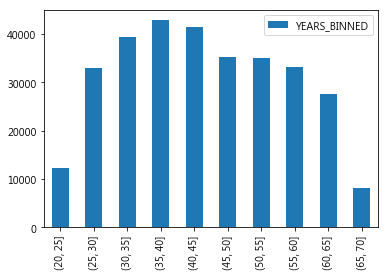

In [59]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['YEARS_BIRTH'] =(abs(app_train['DAYS_BIRTH'])/365)
app_train['YEARS_BIRTH'].head()

# 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
bin_cut =  [20,25,30,35,40,45,50,55,60,65,70]
app_train['YEARS_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], bins = bin_cut) 
print(app_train['YEARS_BINNED'].value_counts().sort_index())

# 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
aa=pd.DataFrame(app_train['YEARS_BINNED'].value_counts().sort_index())
aa.plot(kind='bar')

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [38]:
app_train.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                  55374
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(105302565.0, 117000000.0]         1
(93605130.0, 105302565.0]          0
(81907695.0, 93605130.0]           0
(70210260.0, 81907695.0]           0
(58512825.0, 70210260.0]           0
(46815390.0, 58512825.0]           0
(35117955.0, 46815390.0]           0
(23420520.0, 35117955.0]           0
Name: AMT_INCOME_TOTAL_CAT, dtype: int64


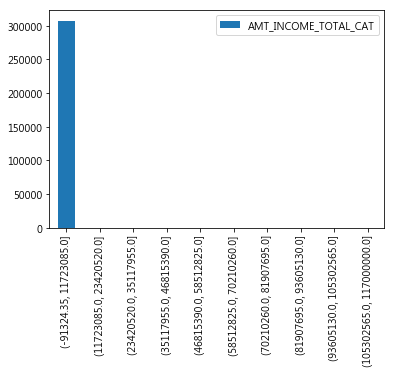

In [65]:
app_train["AMT_INCOME_TOTAL_CAT"] = pd.cut(app_train["AMT_INCOME_TOTAL"], 10)
print(app_train["AMT_INCOME_TOTAL_CAT"].value_counts())

bb=pd.DataFrame(app_train['AMT_INCOME_TOTAL_CAT'].value_counts().sort_index())
bb.plot(kind='bar')

(-0.019, 1.9]    276490
(1.9, 3.8]        30466
(3.8, 5.7]          513
(5.7, 7.6]           28
(7.6, 9.5]            4
(13.3, 15.2]          3
(9.5, 11.4]           3
(17.1, 19.0]          2
(11.4, 13.3]          2
(15.2, 17.1]          0
Name: CNT_CHILDREN_CAT, dtype: int64


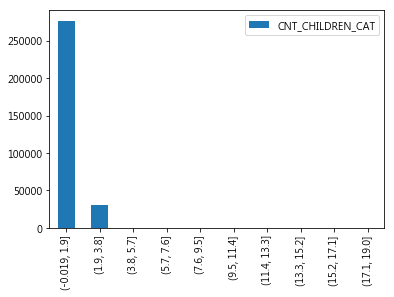

In [67]:
app_train["CNT_CHILDREN_CAT"] = pd.cut(app_train["CNT_CHILDREN"], 10)
print(app_train["CNT_CHILDREN_CAT"].value_counts())

cc=pd.DataFrame(app_train['CNT_CHILDREN_CAT'].value_counts().sort_index())
cc.plot(kind='bar')

(40995.0, 846000.0]       237838
(846000.0, 1647000.0]      63381
(1647000.0, 2448000.0]      5877
(2448000.0, 3249000.0]       395
(3249000.0, 4050000.0]        20
Name: AMT_CREDIT_CAT, dtype: int64


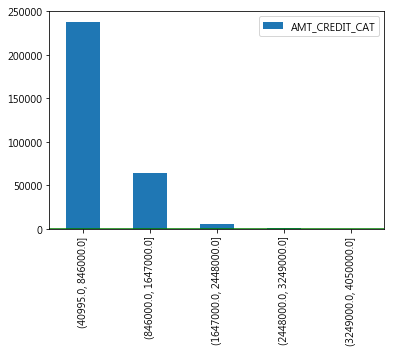

In [72]:
app_train["AMT_CREDIT_CAT"] = pd.cut(app_train["AMT_CREDIT"], 5)
print(app_train["AMT_CREDIT_CAT"].value_counts())

dd=pd.DataFrame(app_train['AMT_CREDIT_CAT'].value_counts().sort_index())
dd.plot(kind='bar')